# Nama : Maya Agustina
## Kelas : A1 2022
## Posttest KB 7

Link Dataset : https://www.kaggle.com/datasets/mdwaquarazam/agricultural-crops-image-classification

In [1]:
!unzip 'archive.zip'

Archive:  archive.zip
replace Agricultural-crops/Cherry/image15.jpeg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

### Mendefinisikan direktori dataset dan Menentukan pengaturan ImageDataGenerator untuk Augmentasi Data

In [3]:
dataset_dir = "Agricultural-crops"
datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2
)

## Data Split

In [4]:
train_generator = datagen.flow_from_directory(
    dataset_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

validation_generator = datagen.flow_from_directory(
    dataset_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

Found 674 images belonging to 30 classes.
Found 155 images belonging to 30 classes.


## Membentuk Model Sequential

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [9]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(30, activation='softmax')
])

## Menggunakan Accurrary sebagai Metrics

In [10]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [11]:
history = model.fit(train_generator, epochs=20, validation_data=validation_generator)

Epoch 1/20
22/22 [==============================] - 13s 379ms/step - loss: 3.5515 - accuracy: 0.0297 - val_loss: 3.3945 - val_accuracy: 0.0452
Epoch 2/20
22/22 [==============================] - 9s 411ms/step - loss: 3.3822 - accuracy: 0.0356 - val_loss: 3.3528 - val_accuracy: 0.0452
Epoch 3/20
22/22 [==============================] - 9s 414ms/step - loss: 3.3134 - accuracy: 0.0682 - val_loss: 3.3200 - val_accuracy: 0.0516
Epoch 4/20
22/22 [==============================] - 8s 352ms/step - loss: 3.2505 - accuracy: 0.0727 - val_loss: 3.2584 - val_accuracy: 0.0774
Epoch 5/20
22/22 [==============================] - 9s 404ms/step - loss: 3.2038 - accuracy: 0.0890 - val_loss: 3.2114 - val_accuracy: 0.0581
Epoch 6/20
22/22 [==============================] - 9s 403ms/step - loss: 3.1946 - accuracy: 0.0727 - val_loss: 3.1674 - val_accuracy: 0.0710
Epoch 7/20
22/22 [==============================] - 8s 359ms/step - loss: 3.1547 - accuracy: 0.1128 - val_loss: 3.2021 - val_accuracy: 0.0903
Epoch

In [12]:
test_generator = datagen.flow_from_directory(
    dataset_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Accuracy: {test_accuracy}")


Found 155 images belonging to 30 classes.
5/5 [==============================] - 2s 314ms/step - loss: 2.8171 - accuracy: 0.2452
Test Accuracy: 0.2451612949371338


## Evaluasi Model

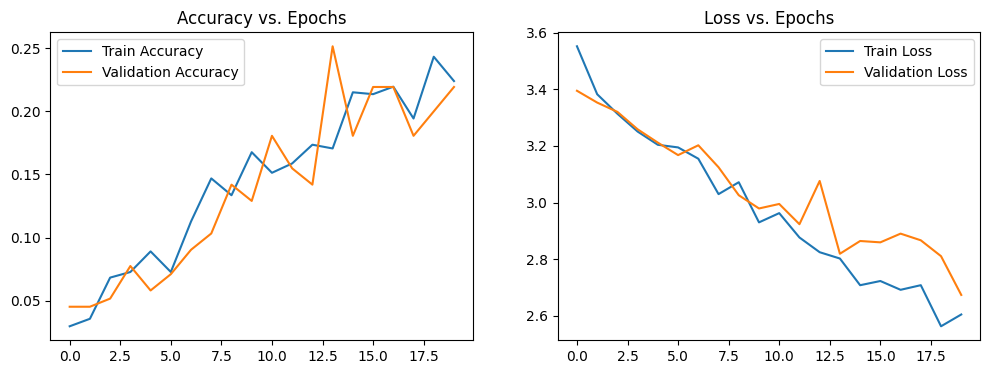

In [13]:
import matplotlib.pyplot as plt

# Plot akurasi dan loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy vs. Epochs')
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss vs. Epochs')
plt.show()
